In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg
import pandas as pd
import datetime
from datetime import datetime

def distance(origin, destination):
    import math
    """
    Calculate the Haversine distance.

    Parameters
    ----------
       origin : tuple of float (lat, long)
       destination : tuple of float (lat, long)

    Returns
    -------
       distance_in_km : float

    Examples
    --------
       origin = (48.1372, 11.5756)  # Munich
       destination = (52.5186, 13.4083)  # Berlin
       round(distance(origin, destination), 1)
       504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [2]:
#import list of all stations
df = pd.read_csv('/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/Stations_coordinates.txt', delimiter=',',names=['station','latitude','longitude','altitude'],header=None)


[392]

In [3]:
#reverse
dfR=df.copy()
dfR=dfR.reindex(index=dfR.index[::-1])
dfR.reset_index(drop=True, inplace=True)
dfR

,station,latitude,longitude,altitude
0,ZYWI,49.686691,-340.794046,412.779092
1,ZWO2,52.502795,-353.906634,65.610258
2,ZUER,41.866356,-0.790411,339.155137
3,ZTL4,33.379688,-84.296725,261.133968
4,ZSU4,18.431336,-65.993477,-28.522560
...,...,...,...,...
8359,0AME,58.870273,-344.999811,143.433004
8360,0ALM,59.866298,-341.929198,56.725812
8361,0ALI,57.929536,-347.472166,116.731976
8362,0AKE,59.481449,-341.698048,43.131235


In [4]:
ten_step=5
n=len(df)
corr=np.zeros([int(len(df)/2),len(df)-1,3]) 

for i in range(int(len(dfR)/2)):
    print(i)
    t=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/U/'+dfR.station[i]+'.txt')[:,0]
    r=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/U/'+dfR.station[i]+'.txt')[:,2]
    df_new=df[df.station!=dfR.station[i]]  
    for st in range(len(df_new)): 
        ts=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/U/'+df_new.station.iloc[st]+'.txt')[:,0]
        indici1=np.nonzero(np.in1d(ts, t))[0]
        if len(indici1)>0:
            indici2=np.nonzero(np.in1d(t, ts))[0]
            dis=distance([df_new.latitude.iloc[st],df_new.longitude.iloc[st]], [dfR.latitude.iloc[i],dfR.longitude.iloc[i]])
            r=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/U/'+dfR.station[i]+'.txt')[:,2]
            rs=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/U/'+df_new.station.iloc[st]+'.txt')[:,2]
            cc=np.corrcoef(rs[indici1],r[indici2])
            corr[i,st,0]=dis
            corr[i,st,1]=cc[0,1]
            corr[i,st,2]=len(indici1)
                
    if (i/n)*100 > ten_step:
        print(str(ten_step)+'%')
        ten_step+=5
            

0


/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057


3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693


KeyboardInterrupt: 

## LOAD RESULTS AND MAKE PLOTS

In [1]:
def weighted_median(values, weights):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, 0.5 * c[-1])]]

import numpy as np
## Save array
#np.save('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_U_reversed_3917',corr)
corr_R=np.load('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_N_reversed_4080.npy')
corr_T=np.load('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_N_4991.npy')
corr_r=np.flip(corr_R,axis=0)

corr=np.concatenate((corr_T[:4286,:,:],corr_r[104:,:,:]))
np.save('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_N',corr)

In [33]:
import numpy as np
## Save array
#np.save('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_U_reversed_3917',corr)

corrE=np.load('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_E.npy')
corrN=np.load('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_N.npy')
corrU=np.load('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_U.npy')

corT=[corrE,corrN,corrU]
components=['E','N','U']

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg
from scipy.interpolate import splev, splrep
%matplotlib auto
plt.ioff()
fig,axes=plt.subplots(3,1,figsize=(9,10))
fig.subplots_adjust(wspace=.32,hspace=0)

c=0
for ax in axes.flat:
    corr=corT[c]
    
    #find time series with temporal intersections
    indici=[]
    for_plot=[] ### this is a list of lists, where each list l contains l[0]= distance, l[1]=corr, l[2]=lenintersect
    for i in range(corr.shape[0]):
        indici.append((np.where(corr[i,:,0]!=0))[0])
        for_plot.append([corr[i,indici[i],0],corr[i,indici[i],1],corr[i,indici[i],2]])
        
    distance = np.hstack(np.array(for_plot,dtype='object')[:,0]) 
    correlation = np.hstack(np.array(for_plot,dtype='object')[:,1]) 
    intersect_len = np.hstack(np.array(for_plot,dtype='object')[:,2]) 
    
    #Remove Nans
    no_nan=np.where(~np.isnan(correlation))
    distance=distance[no_nan]
    correlation=correlation[no_nan]
    intersect_len=intersect_len[no_nan]

    # I normalize the lenintersect
    intersect_len_N=(intersect_len - min(intersect_len)) / (max(intersect_len) - min(intersect_len))

    # I revert the lenintersect [shorter series higher uncertanty]
    ww=intersect_len_N.copy()
    indici_sort=sorted(range(len(intersect_len_N)), key=lambda k: intersect_len_N[k])
    intersect_len_N[indici_sort]=sorted(ww, reverse=True)
    
    #sort distance to make the fit
    dis_sort=np.argsort(distance)
    sorted_dis=[distance[i] for i in dis_sort]
    corr_sort=[correlation[i] for i in dis_sort]
    ww=[intersect_len_N[i] for i in dis_sort]
    
    #distances have to be unique
    indixes_unique_dis=np.unique(sorted_dis, return_index=True)
    ww=[ww[i] for i in indixes_unique_dis[1]]
    
    #make the fit
    spl = splrep(indixes_unique_dis[0], [corr_sort[i] for i in indixes_unique_dis[1]],w=ww,k=4) #,w=intersect_len_N

    #plot the fit
    x2 = np.linspace(0, max(distance), 10000)
    y2 = splev(x2, spl)
    
    #plot the scatter
    scatt=ax.scatter(distance,correlation,s=0.1,c=intersect_len) 
    ax.plot(x2, y2, color='r',
         label='fit')
    ax.set_ylabel('Pearson Correlation')
    ax.set_xlabel('Distance [km]')
    ax.set_ylim([-1,1])
    ax.set_xlim([0,max(distance)])
    if c!=2:
        axes[c].set_xticks([])

    
    ax.text(.5,.04,'Component: '+components[c],horizontalalignment='center',transform= ax.transAxes,fontsize=7,
    bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'),color='k')
    print(c)
    c+=1

cbar=fig.colorbar(scatt, ax=axes.ravel().tolist())
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_title('Intersection [days]', rotation=0, fontdict = {"size":8})

fig.savefig('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Correlation_Residuals.pdf')    
fig.savefig('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Correlation_Residuals.png',dpi=300)    

Using matplotlib backend: nbAgg


### Denoise one time series using correlation

In [32]:
comp='U'
'''
ind=[c for c in range(len(components)) if components[c]==comp][0]
corr=corT[ind]
'''
corr=np.load('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Corr_U.npy')

# Index of the station
ii=1000
df_new=df[df.station!=df.station[ii]] 
print(comp+' '+df.station.loc[ii])

##### Correlation has to be positive #####
indiciS=np.where((corr[ii,:,1]>0.3))[0]
corre_ath=corr[ii,indiciS,1] #correlation
len_ath=corr[ii,indiciS,2] #intersect_length
distance_ath=corr[ii,indiciS,0] #distance
df_new=df_new.iloc[indiciS] #stations to look at

##### Distance has to be positive #####
above_th=np.where(distance_ath<7000)[0]
corre_ath=corre_ath[above_th]
len_ath=len_ath[above_th]
distance_ath=distance_ath[above_th]
df_new=df_new.iloc[above_th]  

##### I normalize intersect_length - distance
len_athN=(len_ath - min(len_ath)) / (max(len_ath) - min(len_ath))
distance_athN=(distance_ath - min(distance_ath)) / (max(distance_ath) - min(distance_ath))


##### Grab time series of the station to denoise
t=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/'+comp+'/'+df.station[ii]+'.txt')[:,0]
d=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/'+comp+'/'+df.station[ii]+'.txt')[:,1]
r=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/'+comp+'/'+df.station[ii]+'.txt')[:,2]

##### Here I allocate the residual of the other stations
matrix_median=np.zeros([len(df_new),len(t)])

n=len(df_new)
ten_step=5

##### I Start the loop 
for st in range(len(df_new)): 
    ts=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/'+comp+'/'+df_new.station.iloc[st]+'.txt')[:,0]
    indici1=np.nonzero(np.in1d(ts, t))[0]
    if len(indici1)>0:
        indici2=np.nonzero(np.in1d(t, ts))[0]
        rs=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/'+comp+'/'+df_new.station.iloc[st]+'.txt')[:,2]
        matrix_median[st,indici2]=rs[indici1]
                
    if (st/n)*100 > ten_step:
        print(str(ten_step)+'%')
        ten_step+=5

combined_weights=len_athN*distance_athN
median_res=np.zeros([len(t)])
median_resW=np.zeros([len(t)])
for kk in range(matrix_median.shape[1]):
    indici_zero=np.where(matrix_median[:,kk]!=0)[0]
    median_res[kk]=np.median(matrix_median[indici_zero,kk])    
    median_resW[kk]=weighted_median(matrix_median[indici_zero,kk], combined_weights[indici_zero])

U CABU
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%


<IPython.core.display.Javascript object>


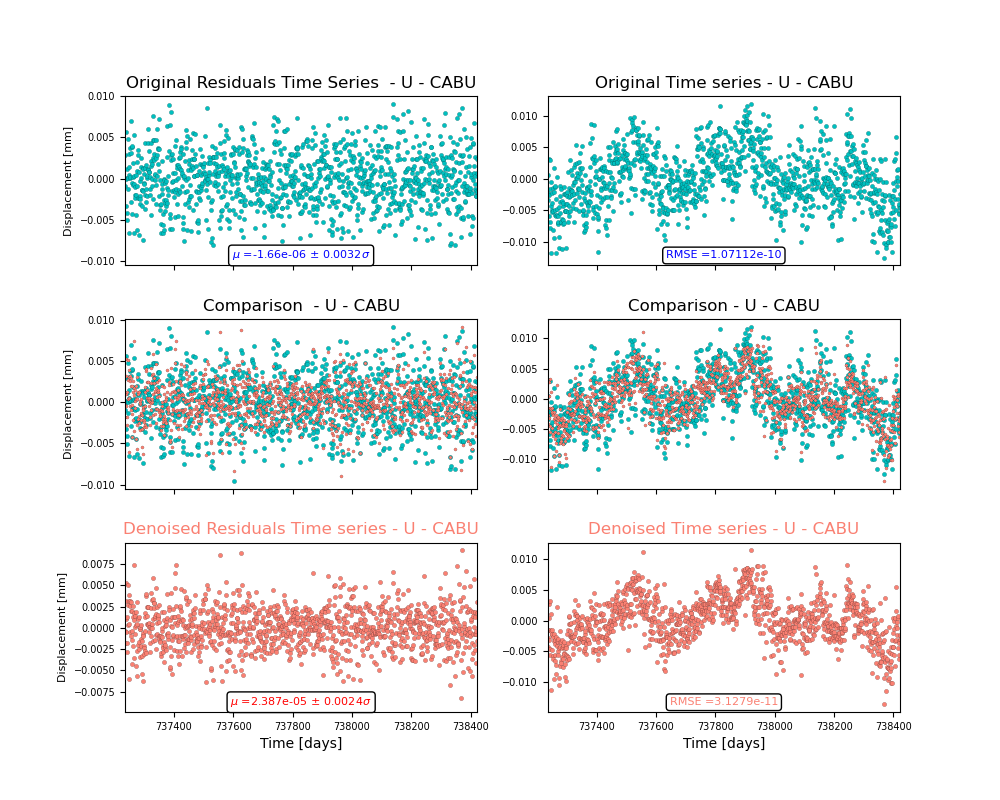

In [34]:
%matplotlib nbagg

### Remove the trend
from scipy.stats import linregress
trend=linregress(t,d)
trend_vector=t*trend.slope+trend.intercept


fig,axes=plt.subplots(3,2,figsize=(10,8))
fig.subplots_adjust(wspace=.2,hspace=0.32)

c=0

axes[0,0].scatter(t,r,s=10,facecolor='c',linewidth=0.1,edgecolors='k')
axes[0,0].set_title('Original Residuals Time Series  - '+comp+' - '+df.station[ii])
axes[0,1].set_title('Original Time series - '+comp+' - '+df.station[ii])
axes[0,1].scatter(t,d-trend_vector,facecolor='c',s=10,linewidth=0.1,edgecolors='k')



axes[1,0].scatter(t,r,s=10,facecolor='c',linewidth=0.1,edgecolors='k')
axes[1,0].set_title('Comparison  - '+comp+' - '+df.station[ii])
axes[1,0].scatter(t,r-median_res,s=5,facecolor='salmon',linewidth=0.1,edgecolors='k')
axes[0,0].text(.5,.04,r'$\mu$ ='+str(round(np.mean(r),8))+' $\pm$ '+str(round(np.std(r),4))+'$\sigma$',horizontalalignment='center',transform= axes[0,0].transAxes,fontsize=8,
    bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'),color='b')


axes[2,0].set_title('Denoised Residuals Time series - '+comp+' - '+df.station[ii],color='salmon')
axes[2,0].scatter(t,r-median_res,s=10,facecolor='salmon',linewidth=0.1,edgecolors='k')
axes[2,0].text(.5,.04,r'$\mu$ ='+str(round(np.mean(r-median_res),8))+' $\pm$ '+str(round(np.std(r-median_res),4))+'$\sigma$',horizontalalignment='center',transform= axes[2,0].transAxes,fontsize=8,
    bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'),color='r')

axes[1,1].set_title('Comparison - '+comp+' - '+df.station[ii])
axes[1,1].scatter(t,d-trend_vector,facecolor='c',s=10,linewidth=0.1,edgecolors='k')
axes[1,1].scatter(t,d-median_res-trend_vector,s=5,facecolor='salmon',linewidth=0.1,edgecolors='k')

axes[2,1].set_title('Denoised Time series - '+comp+' - '+df.station[ii],color='salmon')
axes[2,1].scatter(t,d-median_res-trend_vector,s=10,facecolor='salmon',linewidth=0.1,edgecolors='k')

axes[0,1].text(.5,.04,r'RMSE ='+str(round(np.square(np.mean((r)**2)),15)),horizontalalignment='center',transform= axes[0,1].transAxes,fontsize=8,
    bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'),color='b')
axes[2,1].text(.5,.04,r'RMSE ='+str(round(np.square(np.mean((r-median_res)**2)),15)),horizontalalignment='center',transform= axes[2,1].transAxes,fontsize=8,
    bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'),color='salmon')



for k in range(3):
    axes[k,0].set_ylabel('Displacement [mm]',fontsize=8)
    if k<2:
        axes[2,k].set_xlabel('Time [days]')
    for j in range(2):
        axes[k,j].tick_params(axis='both', which='major', labelsize=7)
        axes[k,j].set_xlim([t[0],t[-1]])
        if k<2:
            axes[k,j].set_xticklabels([])

fig.savefig('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Figures/pdf/CMC_'+str(comp)+'_'+df.station[ii]+'.pdf')    
fig.savefig('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Figures/png/CMC_'+str(comp)+'_'+df.station[ii]+'.png') 

### Frequency spectrum

<IPython.core.display.Javascript object>


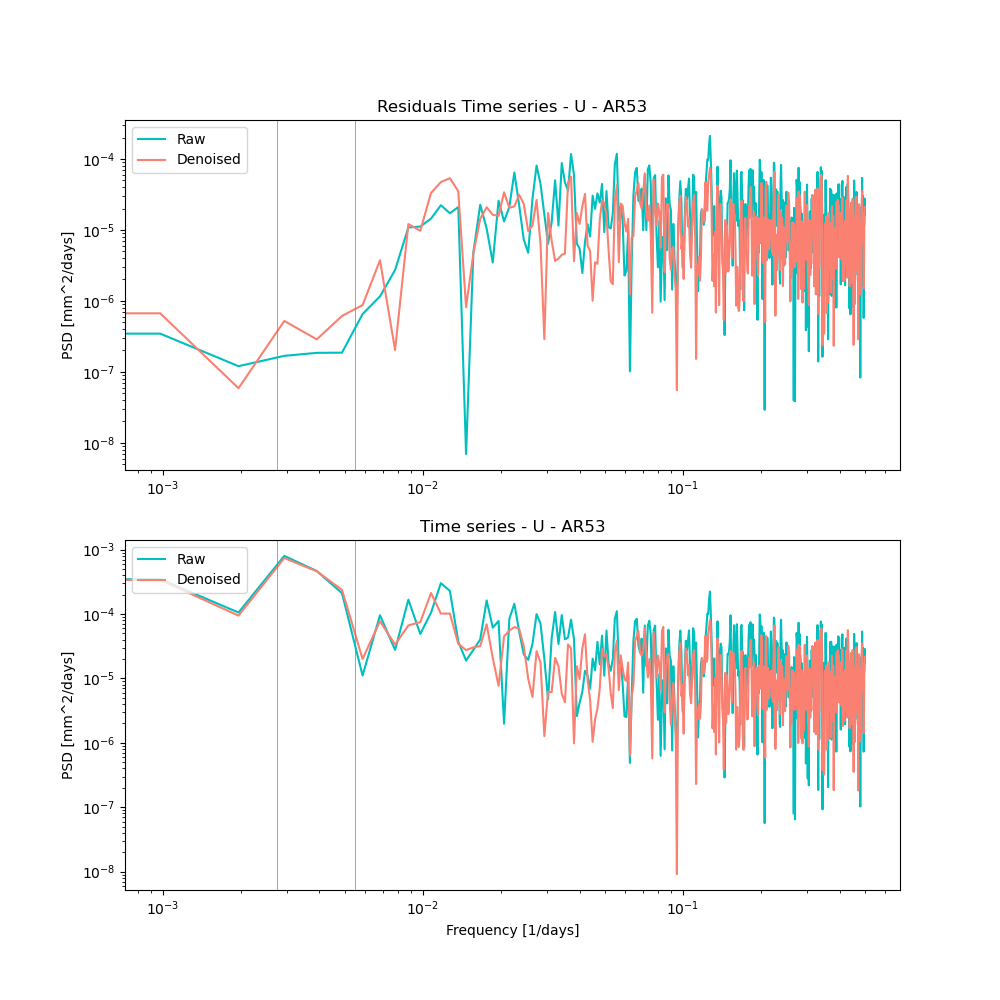

In [31]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
from scipy.stats import linregress
import scipy.signal as signal
trend=linregress(t,d)
trend_vector=t*trend.slope+trend.intercept

freqr,powerr=signal.welch(r,fs=1,nperseg=1024)
freq,power=signal.welch((r-median_res),fs=1,nperseg=1024)

ax[0].loglog(freqr,powerr,label='Raw',color='c')
ax[0].loglog(freq,power,label='Denoised',color='salmon')
ax[0].legend(prop={'size': 10},loc='upper left')
ax[0].set_title('Residuals Time series - '+comp+' - '+df.station[ii],color='k')

freqr,powerr=signal.welch(d-trend_vector,fs=1,nperseg=1024)
freq,power=signal.welch((d-median_res-trend_vector),fs=1,nperseg=1024) 
ax[1].loglog(freqr,powerr,label='Raw',color='c')
ax[1].loglog(freq,power,label='Denoised',color='salmon')
ax[1].legend(prop={'size': 10},loc='upper left')
ax[1].set_title('Time series - '+comp+' - '+df.station[ii],color='k')
ax[1].set_xlabel('Frequency [1/days]')


for i in range(2):       
    ax[i].set_ylabel('PSD [mm^2/days]')  
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].axvline(x=1/365,color='grey',linewidth=0.5)   
    ax[i].axvline(x=1/(365/2),color='grey',linewidth=0.5)   

plt.show()   

fig.savefig('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Figures/pdf/CMC_'+str(comp)+'_'+df.station[ii]+'_spectrum.pdf')    
fig.savefig('/home/giacomo/Documents/Denoiser_GPS/Common_mode_analysis/Figures/png/CMC_'+str(comp)+'_'+df.station[ii]+'_spectrum.png') 

### Denoise one time series without using correlation

In [27]:
ii=500

t=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/E/'+df.station[ii]+'.txt')[:,0]
r=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/E/'+df.station[ii]+'.txt')[:,2]
d=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/E/'+df.station[ii]+'.txt')[:,1]

df_new=df[df.station!=df.station[ii]]  
matrix_median=np.zeros([len(df_new),len(t)])

combined_weights=np.zeros([len(df_new)])
n=len(df_new)
ten_step=5
for st in range(len(df_new)): 
    ts=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/E/'+df_new.station.iloc[st]+'.txt')[:,0]
    indici1=np.nonzero(np.in1d(ts, t))[0]
    if len(indici1)>0:
        indici2=np.nonzero(np.in1d(t, ts))[0]
        rs=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/E/'+df_new.station.iloc[st]+'.txt')[:,2]
        if np.corrcoef(rs[indici1],r[indici2])[0,1]>0.3:
            print(np.corrcoef(rs[indici1],r[indici2])[0,1])
            print(df_new.station.iloc[st])
            matrix_median[st,indici2]=rs[indici1]
            #combined_weights[st]=len(indici2)*distance
                
    if (st/n)*100 > ten_step:
        print(str(ten_step)+'%')
        ten_step+=5
    

0.5248771185707832
0VAG
0.3424558434731869
AB13
0.43450425770119205
AB48
0.5585806586616026
AB49
0.4368490621024543
AB53
0.7186970144569943
ABAD
0.5732779602923813
ABAZ
0.6898779737173764
ABCA
0.6703562683090498
ABHV
0.6969686671147557
ABL1
0.6876889253467154
ABMH
0.6864302539809595
ABMN
0.6675059330857472
ABMO
0.6693688909682437
ABNC
0.6246005489779307
ABRD
0.47778149116787144
ABRH
0.3865950446295258
ABST
0.3527120525647235
AC02
0.43892517866944364
AC03
0.341173051938931
AC06
0.48255807524842764
AC09
0.38264156063921484
AC18
0.404117629067619
AC26
0.3337766231725298
AC28
0.5517804376773779
AC29
0.3869337266495243
AC42
0.38339279150491856
AC45
0.4186566803596749
AC67
0.8157378039545862
ACSB
0.8127298278146768
ACSX
0.6951443819295662
AIR2
0.6433435700733721
AL2H
0.32664702421737574
AL35
0.38755373875012705
AL62
0.3664167702742883
AL76
0.4210872890109117
AL81
0.3844828545616779
ALAN
0.33690566954798445
ALAS
0.5990672991233575
ALBH
0.35405190718388607
ALCL
0.4285814265347885
ALCN
0.393384

0.49769414272398166
IAMW
0.5352326059705219
IAMY
0.5383134073661097
IANE
0.5495236471784853
IANH
0.40662094430608436
IANV
0.3738079237346565
IAOK
0.5164011739403922
IAOL
0.6065283274726501
IAON
0.5314082921107456
IAPA
0.5049770607297196
IAPS
0.5252712773148479
IAPY
0.4462955164228069
IARK
0.505100503210373
IARY
0.5086796503016493
IASG
0.44069773373272986
IASI
0.579875705376039
IASL
0.5621171000947515
IASP
0.5305161977833754
IAST
0.5339604932835121
IASW
0.37676739478231375
IASX
0.4583563467482154
IATI
0.5200910239711679
IATK
0.4688939353917172
IAWB
0.4457688966109877
IAWE
0.4651947059873282
IAWI
0.4890999824959043
IAWK
0.4164788541820438
IAWN
0.48172300662525014
IAWS
0.5085599337952129
IAWT
0.406953173008768
IAWU
0.5018105826641367
IAWY
0.5268742095933512
ICT1
0.7043334369015278
IDAB
0.7526955572764865
IDBF
0.7182794399800205
IDBO
0.6806544259223509
IDBY
0.6657798532603053
IDDY
0.6374580530239281
IDHD
0.6217354415946512
IDMH
0.4186336159411391
IDML
0.7278451807385363
IDMN
0.718112069009

0.4019627009858247
MSTU
0.44518265085090036
MSVC
0.4162997062022645
MSWS
0.38976001727010456
MSWY
0.5752423567944706
MTDT
0.5074794409844436
MTGG
0.32553666270757364
MTL2
0.7024874700986969
MTLO
0.6166558991761244
MTOP
0.4622154605195119
MUSK
0.6495022727849231
NANA
0.41404579237129563
NASA
0.3277462729370923
NBAY
0.3839509245719766
NBRY
0.33269303724057614
NCAL
0.378906224155355
NCAO
0.30355263038370883
NCCN
0.3930700318150083
NCCT
0.30875788074545985
NCED
0.305297732771434
NCEL
0.31283262153621927
NCET
0.34438557696267574
NCGL
0.35582845287194104
NCGO
0.3770387771766335
NCHM
0.33010034618846396
NCJK
0.30439951420650985
NCJL
0.35063882570231136
NCKS
0.31782478965939914
NCLA
0.33599260146800697
NCLM
0.3070140317782882
NCMG
0.3314300734351466
NCNR
0.5633895785532125
NCOW
0.36674756769014916
NCPF
0.33207577203760175
NCRE
0.3350223190875025
NCRK
0.3156980892967094
NCRO
0.385885001790766
NCRR
0.3144066330751631
NCRY
0.31456456489456897
NCS1
0.34666471946367233
NCSD
0.333700388105688
NCSN
0

0.7595493295214774
P590
0.6736631047696102
P594
0.6798844860612082
P599
0.7384228499572733
P602
0.7360608139695042
P603
0.6370092251128276
P604
0.7217969579064412
P607
0.7276255455706223
P608
0.6937800722283838
P610
0.7942802439744757
P611
0.7248647429160451
P612
0.7055035724317883
P615
0.6685707998883609
P616
0.6711139803247108
P617
0.6562803578061621
P618
0.689132048531115
P619
0.7017161933315743
P626
0.6406825524366415
P661
0.78950277632767
P677
0.6372147052368202
P724
0.7137339913112808
P729
0.7088300429947079
P732
0.7293258706117549
P733
0.6711995583480065
P736
0.7344505123024931
P744
0.37795223419178053
P777
0.5654018795460023
P784
0.6215438041934127
P786
0.7096726635153777
P788
0.7047509130770707
P789
0.7056386739646607
P797
0.8073878457921033
P799
0.5675099746599377
P802
0.47262486641829304
P803
0.5992106255341212
P807
0.6672623486627475
P808
0.7781388531778708
P809
0.7934967760648497
P810
0.7079679058058704
P811
0.6824674885972528
P812
0.7166724122939749
P813
0.725347738100731

/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


0.6324990807451242
TNBA
0.6103080426627224
TNCM
0.5432049556535615
TNCN
0.7268139996928294
TNHM
0.5523072214814801
TNIF
0.37648585511900023
TNJN
0.35929594011155785
TNKV
0.5815609047467549
TNLC
0.5860565084255973
TNMS
0.44232086380168134
TNNP
0.7704126874133298
TNPP
0.6435907342064832
TNTB
0.5831768180879773
TNTM
0.44444514495636445
TOBY
0.6424210208812536
TOFI
0.3120231238177109
TOR3
0.7136355823740841
TPOG
0.5840801250928016
TRAI
0.44731150619663496
TRCP
0.6020796289413504
TRHL
0.6621657449365124
TSDL
0.42668350789378534
TSFT
0.7359467002941031
TSFX
0.49845403617751516
TUCS
0.6122326324287446
TWSP
0.508882653137163
TX90
0.3166174769051753
TXAA
0.49039552744282683
TXAB
0.5213750278603004
TXAD
90%
0.3927822232474099
TXB1
0.6001861462319568
TXB3
0.6198340103838782
TXB4
0.4725597352824682
TXB5
0.43138048476420177
TXB6
0.448497090854297
TXBD
0.4576284932064173
TXBE
0.5925248428515917
TXBF
0.5731307893067523
TXBN
0.4352709435476499
TXBO
0.6436461438348763
TXBR
0.5295064968504556
TXBT
0.473

In [111]:
corr=corrE


#find time series with temporal intersections
indici=[]
for_plot=[] ### this is a list of lists, where each list l contains l[0]= distance, l[1]=corr, l[2]=lenintersect
for i in range(corr.shape[0]):
    indici.append((np.where(corr[i,:,0]!=0))[0])
    for_plot.append([corr[i,indici[i],0],corr[i,indici[i],1],corr[i,indici[i],2]])

distance = np.hstack(np.array(for_plot,dtype='object')[:,0]) 
correlation = np.hstack(np.array(for_plot,dtype='object')[:,1]) 
intersect_len = np.hstack(np.array(for_plot,dtype='object')[:,2]) 

#Remove Nans
no_nan=np.where(~np.isnan(correlation))
distance=distance[no_nan]
correlation=correlation[no_nan]
intersect_len=intersect_len[no_nan]

# I normalize the lenintersect
intersect_len_N=(intersect_len - min(intersect_len)) / (max(intersect_len) - min(intersect_len))

# I revert the lenintersect [shorter series higher uncertanty]
ww=intersect_len_N.copy()
indici_sort=sorted(range(len(intersect_len_N)), key=lambda k: intersect_len_N[k])
intersect_len_N[indici_sort]=sorted(ww, reverse=True)




KeyboardInterrupt: 

### Attempt to parellizze

In [26]:
N=len(df)
corr=np.zeros([len(df),len(df)-1,3]) 

def dis_res(i):
    
    print(i)
    t=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/N/'+df.station[i]+'.txt')[:,0]
    r=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/N/'+df.station[i]+'.txt')[:,2]
    df_new=df[df.station!=df.station[i]]  
    for st in range(len(df_new)): 
        ts=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/N/'+df_new.station.iloc[st]+'.txt')[:,0]
        indici1=np.nonzero(np.in1d(ts, t))[0]
        if len(indici1)>0:
            indici2=np.nonzero(np.in1d(t, ts))[0]
            dis=distance([df_new.latitude.iloc[st],df_new.longitude.iloc[st]], [df.latitude.iloc[i],df.longitude.iloc[i]])
            r=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/N/'+df.station[i]+'.txt')[:,2]
            rs=np.loadtxt( '/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/N/'+df_new.station.iloc[st]+'.txt')[:,2]
            cc=np.corrcoef(rs[indici1],r[indici2])
            corr[i,st,0]=dis
            corr[i,st,1]=cc[0,1]
            corr[i,st,2]=len(indici1)
    return corr
            

import multiprocessing as mp

# Step 1: Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# Step 2: `pool.apply` the `howmany_within_range()`
results = [pool.apply(dis_res, args=(i,)) for i in range(int(len(df)/2))]

# Step 3: Don't forget to close
pool.close()    
                  

0


/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/giacomo/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
Process ForkPoolWorker-224:
Process ForkPoolWorker-239:
Process ForkPoolWorker-238:
Process ForkPoolWorker-233:
Process ForkPoolWorker-225:
Process ForkPoolWorker-231:
Process ForkPoolWorker-237:
Process ForkPoolWorker-230:


KeyboardInterrupt: 

Process ForkPoolWorker-227:
Process ForkPoolWorker-228:
Process ForkPoolWorker-235:
Traceback (most recent call last):
Process ForkPoolWorker-226:
Process ForkPoolWorker-234:
Traceback (most recent call last):
Process ForkPoolWorker-236:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/giacomo/anaconda3/lib/p

  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
KeyboardInterrupt
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/giacomo/anaconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__ent

In [18]:
df.loc[0]

KeyError: 0

In [15]:
df

,station,latitude,longitude,altitude
8363,ZYWI,49.686691,-340.794046,412.779092
8362,ZWO2,52.502795,-353.906634,65.610258
8361,ZUER,41.866356,-0.790411,339.155137
8360,ZTL4,33.379688,-84.296725,261.133968
8359,ZSU4,18.431336,-65.993477,-28.522560
...,...,...,...,...
4186,LARJ,-29.414507,-66.850659,536.128094
4185,LAPE,46.672159,-0.148974,200.235668
4184,LAPC,34.181922,-118.574650,207.813257
4183,LAOP,30.529353,-92.080646,1.361779


<IPython.core.display.Javascript object>


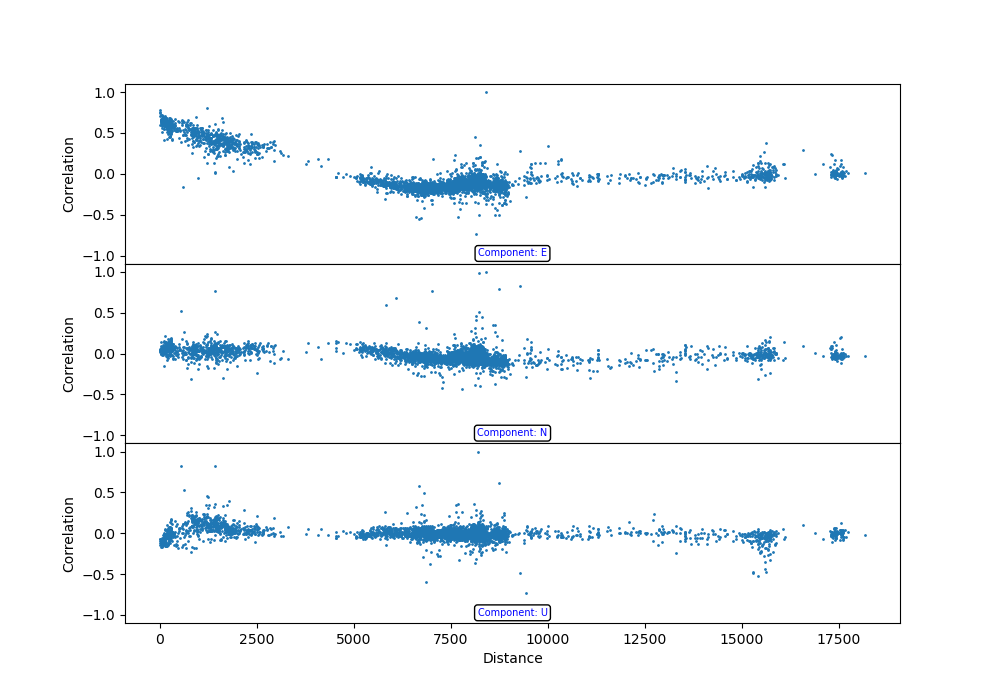

In [56]:
fig,axes=plt.subplots(3,1,figsize=(10,7))
fig.subplots_adjust(wspace=.32,hspace=0)

#find time series with temporal intersections
corr_station=np.where(corr[0,:,0]!=0)

for c in range(len(components)):
    axes[c].scatter(corr[c,corr_station,0],corr[c,corr_station,1],s=1)
    #axes[c].plot(t,X_tot[:,-1]-Y_tot[:,-1],color='y',label='gratsid')
    axes[c].text(.5,.04,'Component: '+components[c],horizontalalignment='center',transform= axes[c].transAxes,fontsize=7,
    bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'),color='b')
    axes[c].set_ylabel('Correlation')
    if c==2:
        axes[c].set_xlabel('Distance')
    axes[c].set_ylim([-1,1])
    axes[c].set_xlim([0,20000])
    
